In [32]:
import pandas
import numpy
from sklearn.preprocessing import MinMaxScaler
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [33]:
def remove_comma(df: pandas.DataFrame):
    for column in df.columns:
        df[column].replace(regex=True, inplace=True, to_replace=r',', value='')

def preprocess_data(df_ld, df_td):
    df_ld.drop(['zone_id', 'year', 'month', 'day'], axis=1, inplace=True)
    df_td.drop(['station_id', 'year', 'month', 'day'], axis=1, inplace=True)
    df_ld.dropna(axis=0, how='any', inplace=True)
    df_td.dropna(axis=0, how='any', inplace=True)
    remove_comma(df_ld)
    df_ld = df_ld.apply(pandas.to_numeric)
    return df_ld, df_td

def scale_data(data):
    temp_data = data.copy()
    scaler = MinMaxScaler()
    temp_data[temp_data.columns] = scaler.fit_transform(temp_data[temp_data.columns])
    return temp_data

In [34]:
load_data = pandas.read_csv('data/Load_history.csv')
temperature_data = pandas.read_csv('data/temperature_history.csv')
load_data, temperature_data = preprocess_data(load_data, temperature_data)
display("Statistical description of load data.")
display(load_data.describe())
display("Statistical description of temperature data.")
display(temperature_data.describe())
scaled_load_data = scale_data(load_data)
scaled_temparature_data = scale_data(temperature_data)

'Statistical description of load data.'

,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
count,31720.000000,31720.000000,31720.000000,31720.000000,31720.000000,31720.000000,31720.000000,31720.000000,31720.000000,31720.000000,...,31720.000000,31720.000000,31720.000000,31720.000000,31720.000000,31720.000000,31720.000000,31720.00000,31720.000000,31720.000000
mean,70921.461255,68365.018253,67222.786917,67219.215637,68877.831747,73186.082850,80895.835309,85008.643821,85604.313398,86039.026072,...,84976.592276,85334.759079,87497.718474,91342.365006,93954.229666,93980.635530,93379.816204,90079.69442,83608.390763,76001.346122
std,63335.583786,61651.221578,61082.233080,61485.321996,63297.373969,67444.414729,74502.132078,77850.771981,77796.629059,77572.454789,...,78671.761052,79063.510346,80617.140212,83395.463130,84927.965376,84121.809471,82949.580739,79473.26948,73336.716316,67116.737479
min,75.000000,71.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,177.000000,...,0.000000,0.000000,2.000000,1.000000,0.000000,3.000000,130.000000,2.00000,2.000000,6.000000
25%,16681.500000,15675.500000,15169.750000,15004.000000,15459.000000,16658.250000,18834.250000,20091.500000,20344.000000,20755.500000,...,19426.500000,19510.750000,20328.000000,21849.500000,23201.000000,23544.250000,23433.750000,22806.00000,21160.000000,18569.250000
50%,57026.500000,53953.500000,52317.000000,51605.000000,52621.500000,55227.500000,61635.000000,63843.000000,63898.000000,64029.000000,...,59924.000000,60016.500000,61935.000000,63821.000000,65862.500000,67851.000000,68851.500000,68957.00000,66284.500000,61915.500000
75%,122822.000000,117035.250000,114248.250000,113829.000000,116647.500000,123021.500000,133503.250000,142248.000000,149480.000000,154708.250000,...,151530.750000,151881.250000,155543.250000,161666.250000,165413.750000,167012.500000,167473.500000,160286.75000,147741.500000,133405.000000
max,435446.000000,448987.000000,465438.000000,483916.000000,507109.000000,538705.000000,540393.000000,538047.000000,530181.000000,483371.000000,...,410920.000000,417029.000000,425147.000000,426805.000000,480793.000000,449788.000000,457045.000000,450044.00000,434296.000000,430548.000000


'Statistical description of temperature data.'

,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
count,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,...,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000
mean,52.815192,52.185472,51.631547,51.123796,50.669915,50.280811,50.392260,51.847968,54.570369,57.780589,...,66.076514,66.191452,65.648765,64.137914,61.622799,58.850072,56.660946,55.327317,54.342376,53.533994
std,15.704152,15.690957,15.702999,15.708534,15.734907,15.771768,16.125607,17.095942,17.628109,17.594346,...,17.467881,17.318609,17.200823,17.311366,17.393181,16.769876,16.078702,15.858632,15.775466,15.742130
min,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,...,16.000000,16.000000,17.000000,16.000000,14.000000,11.000000,9.000000,7.000000,5.000000,5.000000
25%,40.000000,39.000000,39.000000,38.000000,38.000000,37.000000,37.000000,37.000000,40.000000,43.000000,...,52.000000,52.000000,52.000000,50.000000,47.000000,45.000000,44.000000,42.000000,41.000000,41.000000
50%,54.000000,54.000000,53.000000,53.000000,52.000000,52.000000,52.000000,54.000000,56.000000,60.000000,...,68.000000,68.000000,68.000000,66.000000,63.000000,61.000000,58.000000,57.000000,56.000000,55.000000
75%,66.000000,66.000000,65.000000,64.000000,64.000000,64.000000,64.000000,67.000000,70.000000,73.000000,...,81.000000,81.000000,80.000000,79.000000,77.000000,73.000000,71.000000,69.000000,68.000000,67.000000
max,86.000000,85.000000,85.000000,85.000000,83.000000,82.000000,84.000000,87.000000,91.000000,96.000000,...,103.000000,104.000000,103.000000,102.000000,99.000000,97.000000,95.000000,91.000000,92.000000,88.000000


In [35]:
def plot_correlation_matrix(data, correlations):
    names = data.columns
    fig = plt.figure(figsize=(40, 20))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = numpy.arange(0,len(names),1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

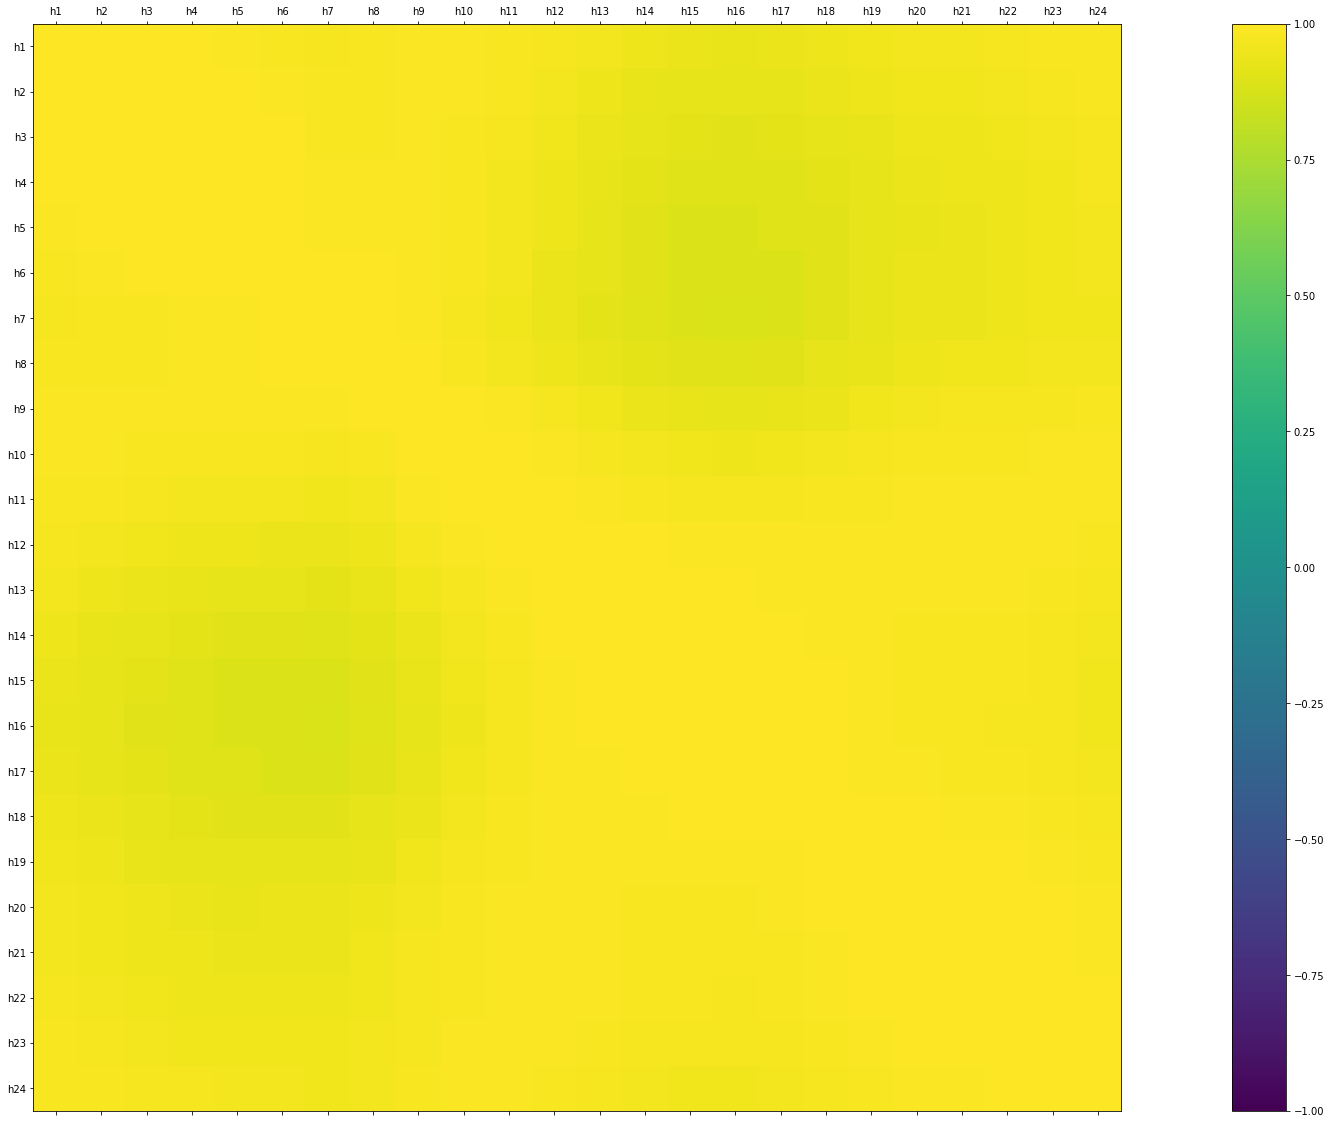

array([  2.32078424e+01,   6.18500226e-01,   7.03649313e-02,
         4.47096324e-02,   2.30408417e-02,   1.16562275e-02,
         6.56294581e-03,   4.29279672e-03,   3.20735444e-03,
         2.11617473e-03,   1.32137451e-03,   1.14392405e-03,
         9.39502396e-04,   7.56872337e-04,   1.20448990e-04,
         5.77959416e-04,   5.56795472e-04,   5.04396145e-04,
         4.36250973e-04,   2.05646058e-04,   2.19108451e-04,
         3.47406178e-04,   3.06034724e-04,   2.70789250e-04])

In [36]:
correlations = scaled_load_data.corr()
plot_correlation_matrix(scaled_load_data, correlations)
eig_vals, eig_vecs = numpy.linalg.eig(correlations)
display(eig_vals)
# Based on the eigenvalues, if we take first five eigenvectors, I think we can capture reasonable variance in data.

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1).fit(scaled_load_data)
pca_load_data = pca.transform(scaled_load_data)
display('Explained Variance')
display(pca.explained_variance_ratio_)
pca_load_data = pandas.DataFrame(pca_load_data, columns = ['d1',])
net_variance = numpy.sum(pca.explained_variance_ratio_[:2])
display(net_variance)

'Explained Variance'

array([ 0.97042799])

0.97042799269896185

'Statistical description of load data'

,d1
count,3.172000e+04
mean,-2.637961e-16
std,8.004251e-01
min,-8.938854e-01
25%,-6.766098e-01
50%,-2.073557e-01
75%,7.106521e-01
max,3.546100e+00


'Scatter mattrix plot of load data'

'Plot of first dimension of load data'

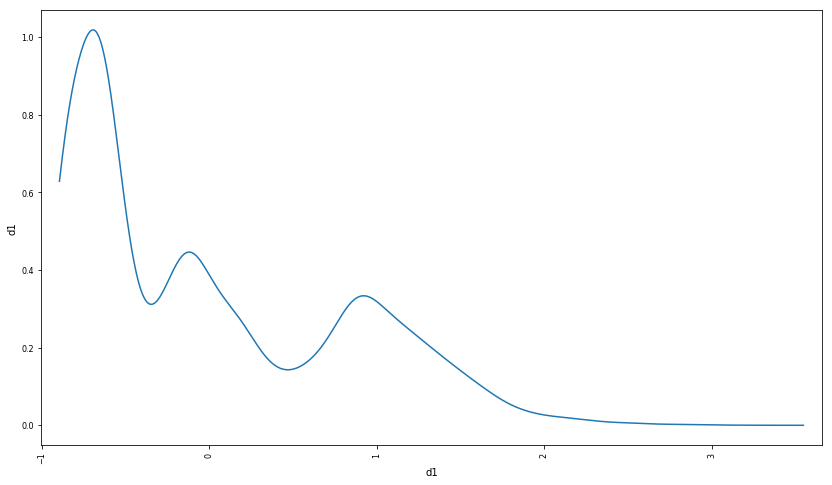

In [41]:
display('Statistical description of load data')
display(pca_load_data.describe())
display('Scatter mattrix plot of load data')
pandas.tools.plotting.scatter_matrix(pca_load_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
display('Plot of first dimension of load data')

Text(0,0.5,'normalized series value')

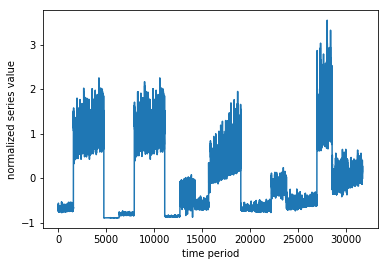

In [42]:
plt.plot(pca_load_data)
plt.xlabel('time period')
plt.ylabel('normalized series value')

In [19]:
# pca_load_data.to_csv('pca_load_dataset.csv', sep='\t')

In [43]:
# window the data using your windowing function
def window_transform_series(series, window_size):
    # containers for input/output pairs
    X = []
    y = []
    for window in range(len(series) - window_size):
        X.append(series[window:window+window_size])
        y.append(series[window + window_size])
    # reshape each 
    X = numpy.asarray(X)
    #X.shape = (np.shape(X)[0:2])
    y = numpy.asarray(y)
    y.shape = (len(y),1)
    return X,y

window_size = 12
X,y = window_transform_series(series = pca_load_data['d1'], window_size = window_size)

In [44]:
train_test_split = int(numpy.ceil(2*len(y)/float(3)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = numpy.asarray(numpy.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = numpy.asarray(numpy.reshape(X_test, (X_test.shape[0], window_size, 1)))
print(X_train[0])

[[-0.71980257]
 [-0.71301956]
 [-0.73371134]
 [-0.74713673]
 [-0.73785823]
 [-0.66247643]
 [-0.60703464]
 [-0.62484159]
 [-0.62369452]
 [-0.60591993]
 [-0.59683321]
 [-0.68332173]]


In [45]:
### TODO: create required RNN model
# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
numpy.random.seed(0)


# TODO: implement build_part1_RNN in my_answers.py
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1), dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1))

# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train, y_train, epochs=10, batch_size=50, verbose=1)

Epoch 1/10
21139/21139 [==============================] - 6s 296us/step - loss: 0.0746

In [47]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))
testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))


training error = 0.02308774617
testing error = 0.0244162103357


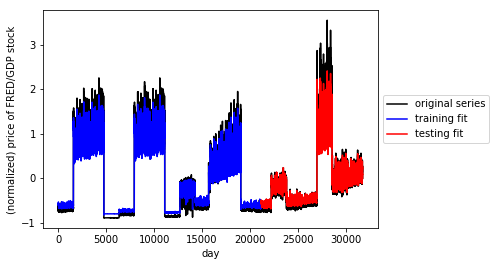

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot original series/
plt.plot(pca_load_data,color = 'k')

# plot training set prediction
split_pt = train_test_split + window_size 
plt.plot(numpy.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(numpy.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('(normalized) price of FRED/GDP stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()